In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:

!unzip -uq "/content/drive/MyDrive/Research and Project Stuffs/BdSL/Datasets/dataset4.zip" -d "/content/drive/MyDrive/Research and Project Stuffs/BdSL/Datasets/"

In [ ]:
# example of progressively loading images from file
from keras.preprocessing.image import ImageDataGenerator
# create generator
datagen = ImageDataGenerator(rescale=1. / 255,validation_split=0.2)
img_height = 224
img_width = 224 
batch_size = 128
# prepare an iterators for each dataset
train_it = datagen.flow_from_directory('/content/drive/MyDrive/Research and Project Stuffs/BdSL/Datasets/dataset4',target_size=(img_height, img_width),batch_size = batch_size, subset='training')
val_it = datagen.flow_from_directory('/content/drive/MyDrive/Research and Project Stuffs/BdSL/Datasets/dataset4',target_size=(img_height, img_width), batch_size = batch_size, subset='validation')

Found 1480 images belonging to 37 classes.
Found 369 images belonging to 37 classes.


In [ ]:
# confirm the iterator works
batchX, batchy = train_it.next()
print('Batch shape=%s, min=%.3f, max=%.3f' % (batchX.shape, batchX.min(), batchX.max()))

Batch shape=(32, 224, 224, 3), min=5.000, max=251.000


In [ ]:
from sklearn.model_selection import train_test_split


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(train_it, test_size=0.2, random_state=42)

KeyboardInterrupt: ignored

In [ ]:
from tensorflow.keras.applications import inception_v3
# Init the VGG model
vgg_conv = inception_v3.InceptionV3(weights='imagenet', include_top=False, input_shape=(img_height, img_height, 3))

87916544/87910968 [==============================] - 0s 0us/step


In [ ]:
# Freeze all the layers
for layer in vgg_conv.layers[:]:
    layer.trainable = False
# Check the trainable status of the individual layers
for layer in vgg_conv.layers:
    print(layer, layer.trainable)

<tensorflow.python.keras.engine.input_layer.InputLayer object at 0x7f5f58be5310> False
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f5f1d684e10> False
<tensorflow.python.keras.layers.normalization_v2.BatchNormalization object at 0x7f5f1a786d10> False
<tensorflow.python.keras.layers.core.Activation object at 0x7f5f1a786c50> False
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f5f1aa8d290> False
<tensorflow.python.keras.layers.normalization_v2.BatchNormalization object at 0x7f5f1aa93f50> False
<tensorflow.python.keras.layers.core.Activation object at 0x7f5f1aa8fd10> False
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f5f1aa207d0> False
<tensorflow.python.keras.layers.normalization_v2.BatchNormalization object at 0x7f5f1aa23590> False
<tensorflow.python.keras.layers.core.Activation object at 0x7f5f1aa1c410> False
<tensorflow.python.keras.layers.pooling.MaxPooling2D object at 0x7f5f1aa18990> False
<tensorflow.python.keras.layers.c

In [ ]:
from keras.models import Sequential, Model
#from tensorflow.keras.models import Model
from keras.layers import Conv2D, MaxPooling2D, Activation, Embedding, Dense, Dropout, Flatten, Input,GlobalAveragePooling2D
from keras import activations
#from tensorflow.python.keras.layers.core import Dense, Dropout, Flatten
#from tensorflow.python.keras.layers import Input
from keras.optimizers import Adam, SGD
from keras.layers import LSTM
#from keras.layers import Dropout
#from keras.applications.vgg16 import VGG16
#from tensorflow.keras.applications import vgg16
from skimage.color import gray2rgb
#from tensorflow.keras.applications.inception_v3 import InceptionV3 
#from tensorflow.keras.applications import DenseNet201

In [ ]:
# Create the model
model = Sequential()

# Add the vgg convolutional base model
model.add(vgg_conv)

# Add new layers
model.add(Flatten())
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(37, activation='softmax'))

# Show a summary of the model. Check the number of trainable parameters
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inception_v3 (Functional)    (None, 5, 5, 2048)        21802784  
_________________________________________________________________
flatten (Flatten)            (None, 51200)             0         
_________________________________________________________________
dense (Dense)                (None, 1024)              52429824  
_________________________________________________________________
dropout (Dropout)            (None, 1024)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 37)                37925     
Total params: 74,270,533
Trainable params: 52,467,749
Non-trainable params: 21,802,784
_________________________________________________________________


In [ ]:
train_it.samples

10656

In [ ]:
import keras
initial_learning_rate = 0.001
lr_schedule = keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate,
    decay_steps=2000,
    decay_rate=0.16,
    staircase=True)
#sgd = keras.optimizers.SGD(lr=0.00001, decay=1e-6, momentum=0.9, nesterov=True)
#model.compile(loss='categorical_crossentropy',
#              optimizer=keras.optimizers.SGD(learning_rate=lr_schedule),
#              metrics=['acc'])
model.compile(loss='categorical_crossentropy',
              optimizer=keras.optimizers.SGD(lr=1e-3),
              metrics=['acc'])

In [ ]:
nb_epochs = 70
batch_size = 128
model.fit_generator(
    train_it,
    steps_per_epoch = train_it.samples // batch_size,
    validation_data = val_it, 
    validation_steps = val_it.samples // batch_size,
    epochs = nb_epochs)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/70
11/11 [==============================] - 10s 598ms/step - loss: 1.6855 - acc: 0.5876 - val_loss: 2.2670 - val_acc: 0.4375
Epoch 2/70
11/11 [==============================] - 6s 496ms/step - loss: 1.3641 - acc: 0.6898 - val_loss: 2.2346 - val_acc: 0.4492
Epoch 3/70
11/11 [==============================] - 5s 491ms/step - loss: 1.2399 - acc: 0.7112 - val_loss: 2.1684 - val_acc: 0.4102
Epoch 4/70
11/11 [==============================] - 6s 520ms/step - loss: 1.1501 - acc: 0.7214 - val_loss: 2.0429 - val_acc: 0.4844
Epoch 5/70
11/11 [==============================] - 5s 493ms/step - loss: 1.0080 - acc: 0.7903 - val_loss: 1.8525 - val_acc: 0.5312
Epoch 6/70
11/11 [==============================] - 5s 491ms/step - loss: 0.8901 - acc: 0.8181 - val_loss: 1.8925 - val_acc: 0.5234
Epoch 7/70
11/11 [==============================] - 5s 508ms/step - loss: 0.7686 - acc: 0.8570 - val_loss: 1.9487 - val_acc: 0.4883
Epoch 8/70
11/11 [==============================] - 5s 492ms/step - loss: 0

In [ ]:
model.save("/content/drive/MyDrive/Research and Project Stuffs/BdSL/Datasets/Dataset_4_inception")

INFO:tensorflow:Assets written to: /content/drive/MyDrive/Research and Project Stuffs/BdSL/Datasets/Dataset_4_inception/assets


In [ ]:
val_it.classes

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  3,  3,  3,  3,
        3,  3,  3,  3,  3,  3,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  5,
        5,  5,  5,  5,  5,  5,  5,  5,  5,  6,  6,  6,  6,  6,  6,  6,  6,
        6,  6,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  8,  8,  8,  8,  8,
        8,  8,  8,  8,  8,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9, 10, 10,
       10, 10, 10, 10, 10, 10, 10, 10, 11, 11, 11, 11, 11, 11, 11, 11, 11,
       11, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 13, 13, 13, 13, 13, 13,
       13, 13, 13, 13, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 15, 15, 15,
       15, 15, 15, 15, 15, 15, 15, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16,
       17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 18, 18, 18, 18, 18, 18, 18,
       18, 18, 18, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 20, 20, 20, 20,
       20, 20, 20, 20, 20, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 22, 22,
       22, 22, 22, 22, 22

In [ ]:
batch_size = 369
# prepare an iterators for each dataset
#train_it = datagen.flow_from_directory('/content/drive/MyDrive/Research and Project Stuffs/BdSL/Datasets/dataset3/dataset',target_size=(img_height, img_width),batch_size = batch_size, subset='training')
val_it = datagen.flow_from_directory('/content/drive/MyDrive/Research and Project Stuffs/BdSL/Datasets/dataset4',target_size=(img_height, img_width), batch_size = batch_size, subset='validation')

Found 369 images belonging to 37 classes.


In [ ]:
test_score = model.evaluate_generator(val_it, batch_size)



print("[INFO] accuracy: {:.2f}%".format(test_score[1] * 100)) 

print("[INFO] Loss: ",test_score[0])

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1877: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  warnings.warn('`Model.evaluate_generator` is deprecated and '


[INFO] accuracy: 62.87%
[INFO] Loss:  1.3954707384109497


In [ ]:
import sys

import numpy as np

from keras import backend as K

from keras.models import Sequential

from keras.layers.core import Dense, Dropout, Activation, Flatten

from keras.layers.convolutional import Convolution2D, MaxPooling2D

from keras.preprocessing.image import ImageDataGenerator

from sklearn.metrics import classification_report, confusion_matrix

from keras.layers import Conv2D, Flatten, Dense, MaxPool2D,MaxPooling2D, Activation, Dropout, BatchNormalization, Input

import matplotlib.pyplot as plt

from keras.optimizers import Adam

import itertools 

In [ ]:
# Loss Curves

plt.figure(figsize=[8,6])

plt.plot(model.history['loss'],'r',linewidth=3.0)

plt.plot(model.history['val_loss'],'b',linewidth=3.0)

plt.legend(['Training loss', 'Validation Loss'],fontsize=18)

plt.xlabel('Epochs ',fontsize=16)

plt.ylabel('Loss',fontsize=16)

plt.title('Loss Curves',fontsize=16)

In [ ]:
#Plot the confusion matrix. Set Normalize = True/False



def plot_confusion_matrix(cm, classes, normalize=True, title='Confusion matrix', cmap=plt.cm.Blues):

    """

    This function prints and plots the confusion matrix.

    Normalization can be applied by setting `normalize=True`.

    """

    plt.figure(figsize=(10,10))



    plt.imshow(cm, interpolation='nearest', cmap=cmap)

    plt.title(title)

    plt.colorbar()



    tick_marks = np.arange(len(classes))

    plt.xticks(tick_marks, classes, rotation=45)

    plt.yticks(tick_marks, classes)



    if normalize:

        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

        cm = np.around(cm, decimals=2)

        cm[np.isnan(cm)] = 0.0

        print("Normalized confusion matrix")

    else:

        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.

    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):

        plt.text(j, i, cm[i, j],

                 horizontalalignment="center",

                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()

    plt.ylabel('True label')

    plt.xlabel('Predicted label')

In [ ]:
y_img_batch, y_class_batch = val_it[0]
y_pred = np.argmax(model.predict(y_img_batch),-1)
y_true = np.argmax(y_class_batch,-1)
print(sum(y_pred==y_true)/batch_size)

0.6287262872628726


In [ ]:
#Print the Target names



target_names = []

for key in val_it.class_indices:

    target_names.append(key)



print(target_names)

['1', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '2', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '3', '30', '31', '32', '33', '34', '35', '36', '37', '4', '5', '6', '7', '8', '9']


Normalized confusion matrix


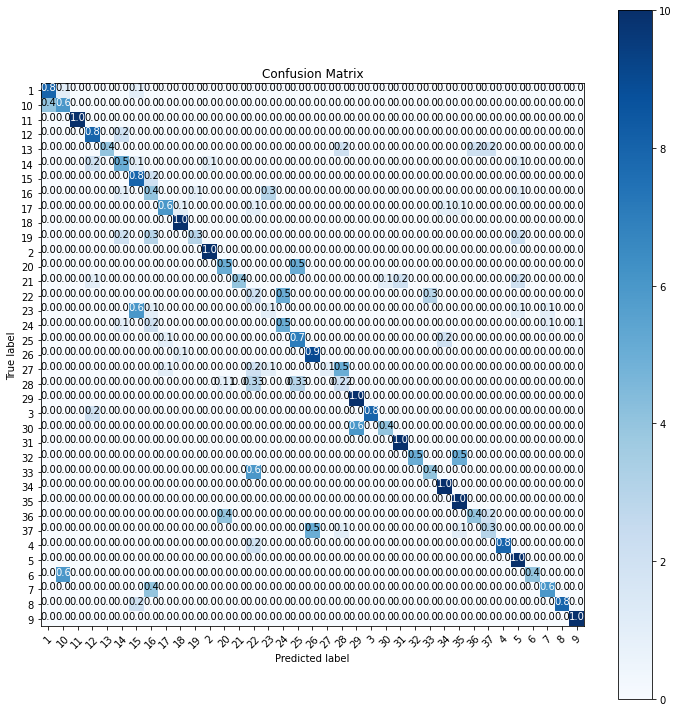

In [ ]:
cm = confusion_matrix(y_true,y_pred)
plot_confusion_matrix(cm, target_names, title='Confusion Matrix')

In [ ]:
#Print Classification Report

print('Classification Report')

print(classification_report(y_true, y_pred, target_names=target_names))

Classification Report
              precision    recall  f1-score   support

           1       0.67      0.80      0.73        10
          10       0.46      0.60      0.52        10
          11       1.00      1.00      1.00        10
          12       0.62      0.80      0.70        10
          13       1.00      0.40      0.57        10
          14       0.45      0.50      0.48        10
          15       0.44      0.80      0.57        10
          16       0.25      0.40      0.31        10
          17       0.75      0.60      0.67        10
          18       0.83      1.00      0.91        10
          19       0.75      0.30      0.43        10
           2       0.91      1.00      0.95        10
          20       0.50      0.50      0.50        10
          21       1.00      0.40      0.57        10
          22       0.12      0.20      0.15        10
          23       0.20      0.10      0.13        10
          24       0.50      0.50      0.50        10
     